**TASK-1**

---


**Problem Statement:**


Develop a text classification model to
classify SMS as either spam or non-spam
using data science techniques in Python.

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving Spam Classifier.png to Spam Classifier (1).png


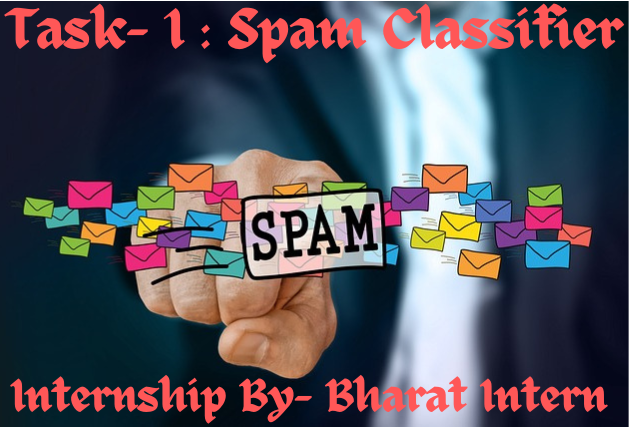

In [ ]:
Image('Spam Classifier.png')

Step 1: Import the Required Libraries

---



---



In [ ]:

import pandas as pd #pandas
import os
import numpy as np  # for mathematical operation
import matplotlib.pyplot as plt  #  for visualization
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

Step 2: Loading the Dataset

---



---



In [ ]:
df = pd.read_csv('/content/spam.csv',encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Step 3: EDA

*   Understanding your variables.
*   Cleaning your dataset.
*   Analyzing relationships between variables.











---



---



In [ ]:
df.shape

(5572, 5)

We have 5572 rows and 5 columns in this particular dataset.

In [ ]:
df.info()  #info gives us the gives a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# checking for NULL values in the dataset.
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

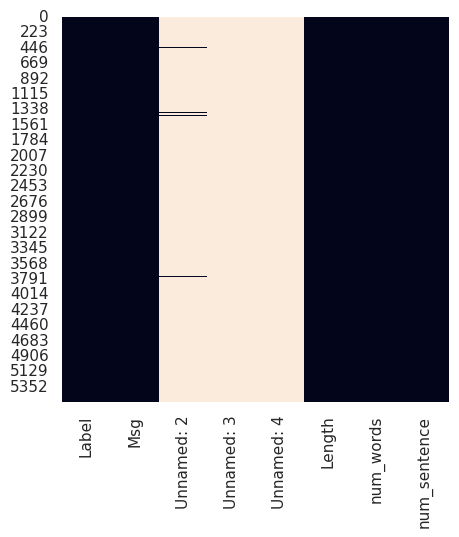

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

We have columns which are unnamed so we will remove the columns as it also contains null values and rename the columns as per our requirement.

In [ ]:
df.rename(columns = {'v1':'Label','v2':'Msg'},inplace = 'True')
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=False, axis=1)

,Label,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,Label,Msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Label            0
Msg              0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

<Axes: ylabel='Label'>

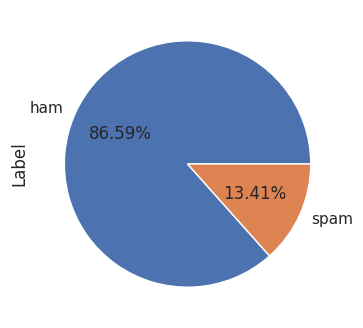

In [ ]:
fig = plt.figure(figsize=(4,4))
df['Label'].value_counts().plot.pie(autopct = '%1.2f%%')

We can see ham = 4825 and spam = 747, which is a imbalanced dataset so we need to balance it.Balancing a dataset makes training a model easier because it helps prevent the model from becoming biased towards one class.

In [ ]:
ham = df[df['Label']=='ham']
spam = df[df['Label']=='spam']

In [ ]:
ham1 = ham.sample(spam.shape[0])

In [ ]:
#balance your data where target value is spam or ham
data = ham1.append(spam, ignore_index =True)
data.shape

(1494, 5)

In [ ]:
data['Label'].value_counts()

ham     747
spam    747
Name: Label, dtype: int64

<Axes: ylabel='Label'>

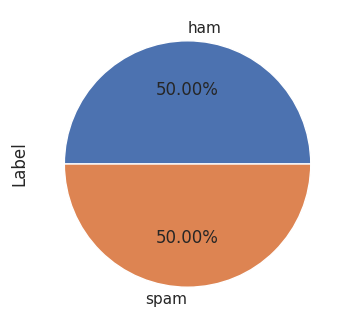

In [ ]:
fig = plt.figure(figsize=(4,4))
data['Label'].value_counts().plot.pie(autopct = '%1.2f%%')

Now data is balanced and it has opted undersampling technique.

Step 4: Text Preprocessing and Visualization

---



In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
# to count the length of the msg
df['Length']= df['Msg'].apply(len)

In [ ]:
# count the number of words in the msg
df['num_words']=df['Msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
# count the number of sentences in the msg
df['num_sentence']=df['Msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Label,Msg,Unnamed: 2,Unnamed: 3,Unnamed: 4,Length,num_words,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


<Axes: xlabel='Length', ylabel='Count'>

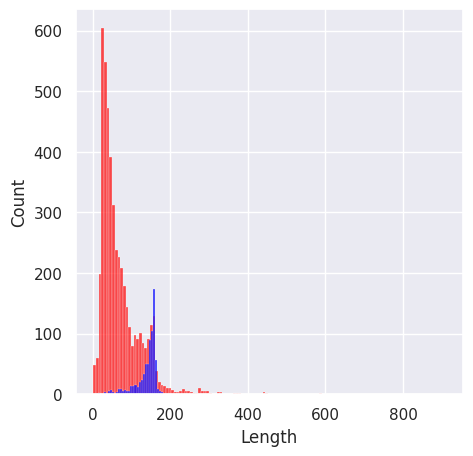

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df[df['Label']=='ham']['Length'],alpha = 0.7,color ='red')
sns.histplot(df[df['Label']=='spam']['Length'],color ='blue')

Step 5: Model Building

---



1.Spliting the data into train and test ML model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(data['Msg'],data['Label'],test_size =0.3,random_state=101)
 # data['Msg'] is the independent variable
 #data['Label] is the dependent variable

In [ ]:
# build NLP model to ensure our text variable gets change into vector format.
from sklearn.feature_extraction.text import TfidfVectorizer

#Machine learning Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#pipeline package to merge NLP and ML together and get the output.

from sklearn.pipeline import Pipeline

**USING RANDOM FOREST CLASSIFIER.**

---



---



In [ ]:
classifier = Pipeline([('TF-IDF',TfidfVectorizer()),
 ('Classifier', RandomForestClassifier())])

In [ ]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

2. Predicting the model

In [ ]:
#predict the model by using train and test data
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [ ]:
y_pred_train

array(['spam', 'spam', 'spam', ..., 'ham', 'spam', 'spam'], dtype=object)

In [ ]:
y_pred_test

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
       'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ha

In [ ]:
y_test

416      ham
497      ham
774     spam
142      ham
864     spam
        ... 
1228    spam
100      ham
601      ham
545      ham
268      ham
Name: Label, Length: 449, dtype: object

Step 6: Evaluation

---



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_train , y_pred_train))
print('*********************'*20)
print(confusion_matrix(y_test, y_pred_test))

[[521   0]
 [  0 524]]
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
[[226   0]
 [ 26 197]]


In [ ]:
print(classification_report(y_train , y_pred_train))
print('*********************'*20)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       226
        spam       1.00      0.88      0.94       223

    accuracy                           0.94       449
   macro avg       0.95      0.94 

In [ ]:
print(accuracy_score(y_train , y_pred_train))
print('*********************'*20)
print(accuracy_score(y_test, y_pred_test))

1.0
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
0.9420935412026726


**USING SVM**

In [ ]:
classifier1 = Pipeline([('TF-IDF',TfidfVectorizer()),
 ('Classifier', SVC())])

In [ ]:
classifier1.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('Classifier', SVC())])

1. Prediction

In [ ]:
#predict the model by using train and test data
y_pred_train1 = classifier1.predict(x_train)
y_pred_test1 = classifier1.predict(x_test)

In [ ]:
print(confusion_matrix(y_train , y_pred_train1))
print('*********************'*20)
print(confusion_matrix(y_test, y_pred_test1))

[[521   0]
 [  1 523]]
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
[[224   2]
 [ 22 201]]


In [ ]:
print(classification_report(y_train , y_pred_train1))
print('*********************'*20)
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       226
        spam       0.99      0.90      0.94       223

    accuracy                           0.95       449
   macro avg       0.95      0.95 

In [ ]:
print(accuracy_score(y_train , y_pred_train1))
print('*********************'*20)
print(accuracy_score(y_test, y_pred_test1))

0.999043062200957
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
0.9465478841870824
